In [ ]:
!pip install pandas numpy scikit-learn matplotlib tensorflow

### Fetch dataset

### Add inports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input

from ucimlrepo import fetch_ucirepo 

In [ ]:
occupancy_detection = fetch_ucirepo(id=193) 

X = occupancy_detection.data.features
y = occupancy_detection.data.targets

df = pd.concat([X, y], axis=1)
print("dataset fetched")

### Dataset overview

In [ ]:
print(df.isnull().mean())
df = df.dropna()
df.info()
df.shape
df.head(15)
df.describe()

### Cleanup dataset

In [ ]:
df = df[[
    'LB', 
    'AC', 'FM', 'UC', 'DL', 
    'DS',
    'DP', 
    'ASTV',
    'MSTV',
    'ALTV',
    'MLTV', 
    'Width', 
    # 'Min', 'Max',
    # 'Nmax', 
    # 'Nzeros',
    # 'Mode', 'Mean',
    # 'Median', 'Variance', 
    # 'Tendency', 
    'CLASS', 
    'NSP'
]]

### Повнозв'язна нейронна мережа MLP (Multilayer Perception)

In [74]:
number_of_classes = 11
target = "CLASS"

X = df
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

1700 train samples
426 test samples


In [75]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [76]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

In [123]:
model = keras.Sequential([
    Input(shape=(14,)), 
    keras.layers.Dense(256, activation="relu"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(number_of_classes, activation="softmax"),
])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,523 (439.54 KB)

 Trainable params: 112,011 (437.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [124]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

In [125]:
model_1_fit = model.fit(
    scaled_X_train,
    y_train_one_hot,
    validation_data=(scaled_X_test, y_test_one_hot),
    verbose=2,
    epochs=60, 
    batch_size=64
)

Epoch 1/60
27/27 - 2s - 86ms/step - accuracy: 0.2471 - loss: 2.2538 - val_accuracy: 0.3803 - val_loss: 2.3523
Epoch 2/60
27/27 - 0s - 12ms/step - accuracy: 0.5753 - loss: 1.6941 - val_accuracy: 0.4789 - val_loss: 2.2890
Epoch 3/60
27/27 - 1s - 23ms/step - accuracy: 0.6959 - loss: 1.2479 - val_accuracy: 0.6244 - val_loss: 2.1981
Epoch 4/60
27/27 - 0s - 15ms/step - accuracy: 0.7459 - loss: 0.9537 - val_accuracy: 0.6737 - val_loss: 2.0923
Epoch 5/60
27/27 - 1s - 20ms/step - accuracy: 0.7941 - loss: 0.7271 - val_accuracy: 0.7934 - val_loss: 1.9733
Epoch 6/60
27/27 - 1s - 26ms/step - accuracy: 0.8312 - loss: 0.6043 - val_accuracy: 0.8310 - val_loss: 1.8392
Epoch 7/60
27/27 - 1s - 36ms/step - accuracy: 0.8529 - loss: 0.4926 - val_accuracy: 0.8709 - val_loss: 1.6890
Epoch 8/60
27/27 - 1s - 25ms/step - accuracy: 0.8729 - loss: 0.4106 - val_accuracy: 0.8850 - val_loss: 1.5305
Epoch 9/60
27/27 - 0s - 11ms/step - accuracy: 0.8888 - loss: 0.3671 - val_accuracy: 0.9108 - val_loss: 1.3720
Epoch 10/6

In [126]:
score = model.evaluate(scaled_X_test, y_test_one_hot, verbose=2)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

14/14 - 0s - 5ms/step - accuracy: 0.9930 - loss: 0.0398
Test score: 0.039778757840394974
Test accuracy: 0.9929577708244324


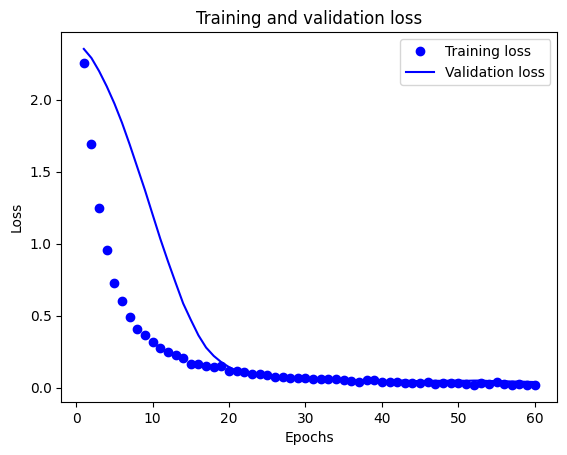

In [127]:
history_dict = model_1_fit.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Task 2a

In [2]:
import kagglehub
import os

import numpy as np
import pathlib
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [3]:
path = kagglehub.dataset_download("oleksandershevchenko/ship-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/user/.cache/kagglehub/datasets/oleksandershevchenko/ship-classification-dataset/versions/3


In [4]:
def list_files_in_subfolders(base_path):
    subfolders = ['train', 'valid', 'test']
    file_counts = {}
    
    for subfolder in subfolders:
        folder_path = os.path.join(base_path, 'ships_dataset', subfolder)
        if os.path.exists(folder_path):
            file_counts[subfolder] = len(os.listdir(folder_path))
    
    return file_counts

file_counts = list_files_in_subfolders(path)

for subfolder, count in file_counts.items():
    print(f"{subfolder} folder contains {count} files")

train folder contains 10 files
valid folder contains 10 files
test folder contains 10 files


In [14]:
def print_files(subfolder):
    folder_path = os.path.join(path, 'ships_dataset', subfolder)
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            print(file)

def print_head_files(subfolder):
    folder_path = os.path.join(path, 'ships_dataset', subfolder)
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files[:10]:
            print(file)

chosen_folder = 'train'
print(f"First 10 files in the {chosen_folder} folder:")
print_files(chosen_folder)
print_head_files("train/Tug")

First 10 files in the train folder:
Container Ship
Tug
Submarine
Aircraft Carrier
Car Carrier
Recreational
Bulkers
Sailboat
Cruise
DDG
Tug_768.jpeg
Tug_618.jpeg
Tug_797.jpeg
Tug_374.jpeg
Tug_280.jpeg
Tug_575.jpeg
Tug_619.jpeg
Tug_753.jpeg
Tug_368.jpeg
Tug_49.jpeg


In [31]:
train_path = path + "/ships_dataset/train"
test_path = path + "/ships_dataset/test"
valid_path = path + "/ships_dataset/valid"

print(train_path)

/home/user/.cache/kagglehub/datasets/oleksandershevchenko/ship-classification-dataset/versions/3/ships_dataset/train


In [32]:
train_images = pathlib.Path(train_path).with_suffix('')
valid_images = pathlib.Path(valid_path).with_suffix('')
test_images = pathlib.Path(test_path).with_suffix('')

In [144]:
batch_size = 16
image_height = int(416 / 4)
image_width = int(600 / 4)

In [145]:
data_augmentation = keras.Sequential([
    keras.layers.InputLayer(shape=(image_height, image_width, 3)),
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

In [146]:
train = keras.utils.image_dataset_from_directory(
    train_images, 
    validation_split=0.2, 
    subset="training", 
    seed=1113, 
    image_size=(image_height, image_width), 
    batch_size=batch_size
)

valid = keras.utils.image_dataset_from_directory(
    valid_images, 
    validation_split=0.2, 
    subset="validation", 
    seed=1311, 
    image_size=(image_height, image_width), 
    batch_size=batch_size
)

test = keras.utils.image_dataset_from_directory(
    test_images, 
    validation_split=0.2, 
    subset="validation", 
    seed=1311, 
    image_size=(image_height, image_width), 
    batch_size=batch_size
)

Found 8534 files belonging to 10 classes.
Using 6828 files for training.
Found 689 files belonging to 10 classes.
Using 137 files for validation.
Found 781 files belonging to 10 classes.
Using 156 files for validation.


In [147]:
print(train.class_names)
class_number = len(train.class_names)
print(class_number)

['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']
10


In [148]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid = valid.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

In [171]:
conv_model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  
  # 1 Conv Block
  keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),

  # 2 Conv Block
  keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
    
  # Flatten and Dense Layers
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(class_number, activation='softmax', name="outputs")
])
conv_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 104, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 104, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 75, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 10, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,147,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,259,018 (4.80 MB)

 Trainable params: 1,258,634 (4.80 MB)

 Non-trainable params: 384 (1.50 KB)

In [172]:
conv_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [173]:
import tensorflow.keras.backend as K

K.clear_session()

history_conv_model_fit = conv_model.fit(train, validation_data = valid, epochs=3)

Epoch 1/3
427/427 ━━━━━━━━━━━━━━━━━━━━ 74s 159ms/step - accuracy: 0.3137 - loss: 2.2808 - val_accuracy: 0.3796 - val_loss: 1.8336
Epoch 2/3
427/427 ━━━━━━━━━━━━━━━━━━━━ 73s 171ms/step - accuracy: 0.6359 - loss: 1.1765 - val_accuracy: 0.6861 - val_loss: 1.0675
Epoch 3/3
427/427 ━━━━━━━━━━━━━━━━━━━━ 77s 160ms/step - accuracy: 0.7174 - loss: 0.9370 - val_accuracy: 0.6131 - val_loss: 1.8561


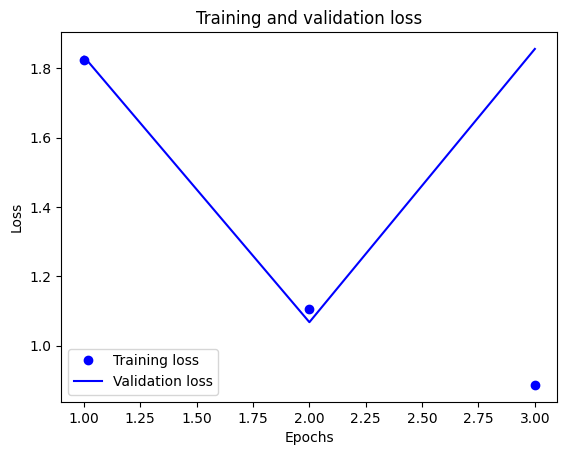

In [228]:
history_dict = history_conv_model_fit.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [229]:
score = conv_model.evaluate(test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 5.141221046447754
Test accuracy: 0.45512819290161133


### Task 2b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [222]:
base_model = keras.applications.InceptionV3(weights='imagenet', include_top=False)

base_model.trainable = False

data_augmentation2 = keras.Sequential([
    keras.layers.InputLayer(shape=(image_height, image_width, 3)),
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

tuning_model = model = keras.Sequential([
    data_augmentation2,
    keras.layers.Rescaling(1./255),
    base_model,
    
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(class_number, activation="sigmoid")
])

tuning_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_21 (Sequential)      │ (None, 104, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 104, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2165        │ (None, 1, 3, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,439,082 (93.23 MB)

 Trainable params: 2,632,202 (10.04 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

In [223]:
tuning_model.compile(
    optimizer='rmsprop',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

history_tuning_model_fit = tuning_model.fit(
    train,
    batch_size = batch_size,
	epochs = 10,
    validation_data = valid
)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 153s 334ms/step - accuracy: 0.6101 - loss: 1.3973 - val_accuracy: 0.8029 - val_loss: 0.6416
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 193s 313ms/step - accuracy: 0.7618 - loss: 0.8059 - val_accuracy: 0.8175 - val_loss: 0.5371
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 153s 357ms/step - accuracy: 0.7981 - loss: 0.6921 - val_accuracy: 0.7591 - val_loss: 1.1808
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 176s 296ms/step - accuracy: 0.8083 - loss: 0.6696 - val_accuracy: 0.7737 - val_loss: 1.1933
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 142s 296ms/step - accuracy: 0.8310 - loss: 0.6033 - val_accuracy: 0.8321 - val_loss: 0.5182
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 129s 302ms/step - accuracy: 0.8456 - loss: 0.5724 - val_accuracy: 0.8540 - val_loss: 0.8382
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 151s 353ms/step - accuracy: 0.8572 - loss: 0.5634 - val_accuracy: 0.7956 - val_loss: 0.7802
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 154s 361ms/step - accuracy: 0.8726 -

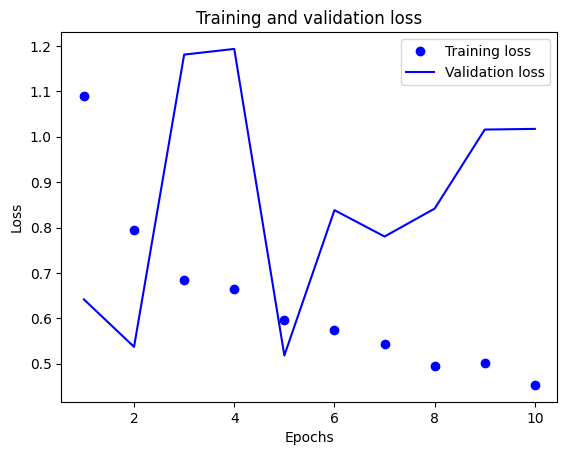

In [226]:
history_dict = history_tuning_model_fit.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [227]:
score = tuning_model.evaluate(train, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

427/427 ━━━━━━━━━━━━━━━━━━━━ 116s 273ms/step - accuracy: 0.8953 - loss: 0.4370
Test score: 0.4472332298755646
Test accuracy: 0.892647922039032


### Task 3a

In [104]:
import kagglehub

from collections import Counter

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Embedding, GlobalAveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [105]:
path = kagglehub.dataset_download("therohk/ireland-historical-news")
df = pd.read_csv(path + "/ireland-news-headlines.csv")

categories_of_interest = ['sport', 'news', 'business']

In [106]:
from collections import Counter
from sklearn.model_selection import train_test_split

df['main_category'] = df['headline_category'].apply(lambda x: x.split('.')[0])
top_10_categories = [category for category, _ in Counter(df['main_category']).most_common(10)]
df = df[df['main_category'].isin(top_10_categories)]

df = df[['headline_text', 'main_category']].rename(columns={'headline_text': 'text', 'main_category': 'label'})

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.20)

df_train = pd.DataFrame({'text': x_train, 'label': y_train})
df_test = pd.DataFrame({'text': x_test, 'label': y_test})

df_train.head()
df_test.head()
df.head()

,text,label
0,UUP sees possibility of voting Major out,news
1,Pubs targeted as curbs on smoking are extended,news
2,Papers reveal secret links with O'Neill cabinet,news
3,Domestic chaos as Italy takes EU presidency,news
4,Learning about the star to which we owe life,news


In [107]:
Counter(df['label'])

Counter({'news': 798684,
         'sport': 261827,
         'business': 222960,
         'opinion': 133073,
         'culture': 98945,
         'lifestyle': 96006})

In [122]:
df_train['text'] = df_train['text'].fillna('').astype(str)
df_test['text'] = df_train['text'].fillna('').astype(str)

texts = df_train["text"].apply(str)
labels = df_train["label"]

In [109]:
max_words = 10000 # max number of words to use in the vocabulary
max_len = 100 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 64 # number of units in the LSTM layer
num_classes = 6 # number of classes

In [110]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y = keras.utils.to_categorical(y_encoded, num_classes)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=max_len)

In [116]:
import tensorflow.keras.backend as K

from keras.optimizers import Adam
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
# model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
# model.add(Dropout(0.3))
model.add(LSTM(lstm_units))
# model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [117]:
K.clear_session()

history = model.fit(x, y, batch_size=64, epochs=5, validation_split=0.02)

Epoch 1/5
 1574/19741 ━━━━━━━━━━━━━━━━━━━━ 27:08 90ms/step - accuracy: 0.5925 - loss: 1.1126

KeyboardInterrupt: 

In [118]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,127,892 (11.93 MB)

 Trainable params: 1,042,630 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,085,262 (7.95 MB)

### Task 3b